In [7]:
import csv

import matplotlib.pyplot as plt


In [8]:
def get_thermostat_results():
    folder = "benchmarks/thermostat/results"
    approaches = ["hycomp", "dreach", "upm", "upm_e", "enhsp", "enhsp_e_001", "enhsp_e_01"]
    horizons = [2, 4, 6, 8, 10 , 20, 30, 40, 50, 60, 70, 80, 90, 100]
    
    results = { app: {h:[] for h in horizons} for app in approaches}

    for app in approaches:
        with open("{}/{}".format(folder, app), "r") as f:
            for h in horizons:
                app_results = f.readline()
                app_results = list(map(float,app_results.split()))
                results[app][h] = app_results
    return results

In [9]:
def get_platoon_results():
    folder = "benchmarks/platoon/results"
    approaches = ["dreach", "upm", "upm_e", "enhsp", "enhsp_e_001", "enhsp_e_01"]
    horizons = [2, 4, 6, 8, 10 , 20, 30, 40, 50, 60, 70, 80, 90, 100]
    
    results = { app: {h:[] for h in horizons} for app in approaches}

    for app in approaches:
        with open("{}/{}".format(folder, app), "r") as f:
            for h in horizons:
                app_results = f.readline()
                app_results = list(map(float,app_results.split()))
                results[app][h] = app_results
    return results

In [10]:
def get_flight_results():
    folder = "benchmarks/flight/results"

    approaches = ["dreach", "falstar", "enhsp", "enhsp_e_001", "enhsp_e_01", "enhsp_e_04"]
    horizons = [2, 4, 6, 8, 10 , 20, 30, 40, 50, 60, 70, 80, 90, 100]

    results = { app: {h:[] for h in horizons} for app in approaches}

    for app in approaches:
        with open("{}/{}".format(folder, app), "r") as f:
            for h in horizons:
                app_results = f.readline()
                app_results = list(map(float,app_results.split()))
                results[app][h] = app_results
    return results

In [11]:
horizons = [2, 4, 6, 8, 10 , 20, 30, 40, 50, 60, 70, 80, 90, 100]

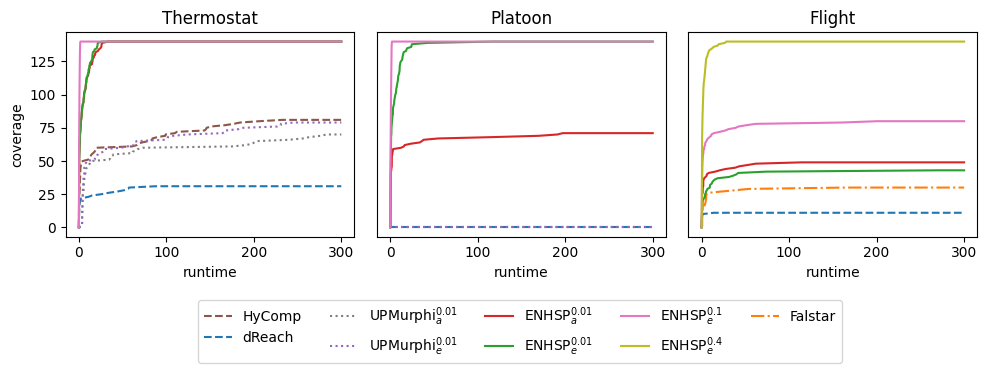

In [53]:
names = dict()
names["Flight"] = {"dreach": "dReach", "falstar": "Falstar", "enhsp": "ENHSP$_a^{0.01}$", "enhsp_e_001": "ENHSP$_e^{0.01}$", "enhsp_e_01": "ENHSP$_e^{0.1}$", "enhsp_e_04": "ENHSP$_e^{0.4}$"}
names["Platoon"] = {"dreach": "dReach", "upm": "UPMurphi$_a^{0.01}$", "upm_e": "UPMurphi$_e^{0.01}$", "enhsp": "ENHSP$_a^{0.01}$", "enhsp_e_001": "ENHSP$_e^{0.01}$", "enhsp_e_01": "ENHSP$_e^{0.1}$"}
names["Thermostat"] = {"hycomp": "HyComp", "dreach": "dReach", "upm": "UPMurphi$_a^{0.01}$", "upm_e": "UPMurphi$_e^{0.01}$", "enhsp": "ENHSP$_a^{0.01}$", "enhsp_e_001": "ENHSP$_e^{0.01}$", "enhsp_e_01": "ENHSP$_e^{0.1}$"}

all_labels = set()
all_labels = all_labels.union(names["Flight"].keys())
all_labels = all_labels.union(names["Platoon"].keys())
all_labels = all_labels.union(names["Thermostat"].keys())

all_labels = list(all_labels)

colors = {all_labels[i]:plt.cm.tab10(i*0.1) for i in range(len(all_labels))}
linestyles = dict()
for app in all_labels:
    if "enhsp" in app:
        linestyles[app] = "solid"
    elif "upm" in app:
        linestyles[app] = "dotted"
    elif "dreach" in app:
        linestyles[app] = "dashed"
    elif "hycomp" in app:
        linestyles[app] = "dashed"
    elif "falstar" in app:
        linestyles[app] = "dashdot"

fig, axs = plt.subplots(1,3, figsize=(10,3))

axs[0].set_ylabel("coverage")
domains = ["Thermostat", "Platoon", "Flight"]

for i in range(len(domains)):
    domain = domains[i]
    if domain == "Flight":
        results = get_flight_results()
        approaches = results.keys()
    elif domain == "Platoon":
        results = get_platoon_results()
        approaches = results.keys()
    elif domain == "Thermostat":
        results = get_thermostat_results()
        approaches = results.keys()
    else:
        approaches = []
    axs[i].set_title(domain)
    for app in approaches:
        runtimes = []
        for h in horizons:
            runtimes += results[app][h]
            runtimes = sorted(runtimes)
        x = [j+1 for j in range((len(runtimes)))]
        
        runtimes = [0] + runtimes
        x = [0] + x
        runtimes += [300]
        x += [x[-1]]

        axs[i].set_xlabel("runtime")
        axs[i].plot(runtimes, x, label=names[domain][app], c=colors[app], linestyle=linestyles[app])
        # axs[i].legend(loc=(0.12,0.58),ncol=2)

    axs[1].set_yticks([])
    axs[2].set_yticks([])

axs[0].plot([],[], label="ENHSP$_e^{0.4}$",c=colors["enhsp_e_04"], linestyle=linestyles["enhsp_e_04"])
axs[0].plot([],[], label="Falstar",c=colors["falstar"], linestyle=linestyles["falstar"])


fig.tight_layout()
plt.savefig("survival.pdf",bbox_inches='tight')


handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.525,-0.25), ncol=int(len(labels)/2)+1,bbox_transform=fig.transFigure)

